# Reading files saved out from looping aircraft code

In [1]:
from melodies_monet import driver

/home/charkins/miniconda3/envs/melodies-monet_aircraft/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [2]:
control_fn='../yaml/control_read_looped_aircraft.yaml'
an = driver.analysis()
an.control=control_fn
an.read_control() 
an.control_dict  

{'analysis': {'start_time': '2019-07-22-00:00:00',
  'end_time': '2019-09-05-23:59:00',
  'output_dir': '/wrk/charkins/melodies_monet/aircraft/develop_aircraft_looping/output',
  'debug': True,
  'read': {'paired': {'method': 'netcdf',
    'filenames': {'firexaq_wrfchem_v4.2': ['/wrk/charkins/melodies_monet/aircraft/develop_aircraft_looping/output/0722_firexaq_wrfchem_v4.2.nc4',
      '/wrk/charkins/melodies_monet/aircraft/develop_aircraft_looping/output/0905_firexaq_wrfchem_v4.2.nc4']}}}},
 'model': {'wrfchem_v4.2': {'files': '/wrk/charkins/melodies_monet/aircraft/develop_aircraft_looping/all_days_model/*',
   'mod_type': 'wrfchem',
   'mod_kwargs': {'mech': 'racm_esrl_vcp'},
   'radius_of_influence': 12000,
   'mapping': {'firexaq': {'no2': 'NO2_CL_RYERSON',
     'no': 'NO_CL_RYERSON',
     'o3': 'O3_CL_RYERSON'}},
   'variables': {'pres_pa_mid': {'rename': 'pressure_model',
     'unit_scale': 1,
     'unit_scale_method': '*'},
    'temperature_k': {'rename': 'temp_model',
     'unit

In [3]:
an.open_models()

wrfchem
/wrk/charkins/melodies_monet/aircraft/develop_aircraft_looping/all_days_model/*
**** Reading WRF-Chem model output...


In [4]:
an.models

{'wrfchem_v4.2': model(
     model='wrfchem',
     radius_of_influence=12000,
     mod_kwargs={'mech': 'racm_esrl_vcp', 'var_list': ['no', 'no2', 'o3', 'pres', 'height', 'tk', 'height_agl', 'PSFC']},
     file_str='/wrk/charkins/melodies_monet/aircraft/develop_aircraft_looping/all_days_model/*',
     label='wrfchem_v4.2',
     obj=...,
     mapping={'firexaq': {'no2': 'NO2_CL_RYERSON', 'no': 'NO_CL_RYERSON', 'o3': 'O3_CL_RYERSON'}},
     label='wrfchem_v4.2',
     ...
 )}

In [5]:
an.models['wrfchem_v4.2'].obj

<xarray.Dataset>
Dimensions:         (y: 284, x: 440, time: 62, z: 50)
Coordinates:
    longitude       (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude        (y, x) float32 21.19 21.22 21.24 21.27 ... 50.28 50.24 50.2
  * time            (time) datetime64[ns] 2019-07-22 ... 2019-09-06T06:00:00
Dimensions without coordinates: y, x, z
Data variables:
    no              (time, z, y, x) float32 0.003988 0.004022 ... 5.302e-09
    no2             (time, z, y, x) float32 0.01333 0.01339 ... 0.08481 0.08481
    o3              (time, z, y, x) float32 30.0 30.0 ... 1.971e+03 1.971e+03
    pressure_model  (time, z, y, x) float32 1.011e+05 1.011e+05 ... 5.584e+03
    alt_msl_m_mid   (time, z, y, x) float32 11.31 11.31 ... 2.016e+04 2.016e+04
    temp_model      (time, z, y, x) float32 295.1 295.2 295.1 ... 220.5 220.4
    alt_agl_m_mid   (time, z, y, x) float32 11.32 11.32 ... 2.015e+04 2.016e+04
    surfpres_pa     (time, y, x) float32 1.013e+05 1.013e+05 ... 1.007e+05
Attributes: (12/15)
    FieldType:                 104
    MemoryOrder:               XYZ
    description:               NO mixing ratio
    units:                     ppmv
    stagger:                   
    coordinates:               XLONG XLAT XTIME
    ...                        ...
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

In [6]:
an.open_obs()

/home/charkins/miniconda3/envs/melodies-monet_aircraft/lib/python3.9/site-packages/xarray/core/groupby.py:534: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  index_grouper = pd.Grouper(


In [7]:
#All the info in the observation class can also be called.
an.obs['firexaq'].obj

<xarray.Dataset>
Dimensions:                                       (time: 35)
Coordinates:
  * time                                          (time) datetime64[ns] 2019-...
Data variables: (12/642)
    Time_Stop                                     (time) float64 6.35e+04 ......
    Day_Of_Year_YANG                              (time) float64 248.0 ... 248.0
    latitude                                      (time) float64 38.73 ... 34.63
    longitude                                     (time) float64 -97.65 ... -...
    altitude                                      (time) float64 894.7 ... 770.1
    HAE_GPS_Altitude_YANG                         (time) float64 868.9 ... 736.1
    ...                                            ...
    smoke_age_HOLMES                              (time) float64 nan nan ... nan
    smoke_age_corr_HOLMES                         (time) float64 nan nan ... nan
    smoke_age_rise_HOLMES                         (time) float64 nan nan ... nan
    smoke_rise_HOLMES                             (time) float64 nan nan ... nan
    fire_distance_HOLMES                          (time) float64 nan nan ... nan
    smoke_agemethod_HOLMES                        (time) float64 nan nan ... nan
Attributes: (12/23)
    source:               Merged Flight#20190905, on the DC8 platform. Data i...
    Date Revised:         2022-02-11 00:00:00
    mission:              FIREXAQ
    organization:         NASA Langley Research Center
    PI:                   Suborbital Science Data for Atmospheric Composition
    PI_CONTACT_INFO:      gao.chen@nasa.gov, michael.shook@nasa.gov, ali.a.ak...
    ...                   ...
    PROJECT_INFO:         FIREXAQ
    STIPULATIONS_ON_USE:  N/A
    OTHER_COMMENTS:       This merge was created using the SSD-AC online merg...
    REVISION:             R1
    R1:                   File generated from data submitted before 2022, 2, ...
    R0:                   File was generated using the online merge tool.

In [8]:
an.read_analysis()

Reading: /wrk/charkins/melodies_monet/aircraft/develop_aircraft_looping/output/0722_firexaq_wrfchem_v4.2.nc4
Reading: /wrk/charkins/melodies_monet/aircraft/develop_aircraft_looping/output/0905_firexaq_wrfchem_v4.2.nc4


In [9]:
an.paired['firexaq_wrfchem_v4.2'].obj

<xarray.Dataset>
Dimensions:                                       (time: 76, x: 1)
Coordinates:
  * time                                          (time) datetime64[ns] 2019-...
Dimensions without coordinates: x
Data variables: (12/646)
    Time_Stop                                     (time, x) float64 6.59e+04 ...
    Day_Of_Year_YANG                              (time, x) float64 203.0 ......
    latitude                                      (time, x) float64 34.64 ......
    longitude                                     (time, x) float64 -118.1 .....
    altitude                                      (time, x) float64 1.33e+03 ...
    HAE_GPS_Altitude_YANG                         (time, x) float64 1.301e+03...
    ...                                            ...
    fire_distance_HOLMES                          (time, x) float64 nan ... nan
    smoke_agemethod_HOLMES                        (time, x) float64 nan ... nan
    no2                                           (time, x) float64 0.1225 .....
    no                                            (time, x) float64 0.0199 .....
    o3                                            (time, x) float64 51.31 ......
    temp_model                                    (time, x) float64 300.4 ......
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2024-03-13
    dict_json:     {\n    "type": "aircraft",\n    "radius_of_influence": nul...
    group_name:    firexaq_wrfchem_v4.2

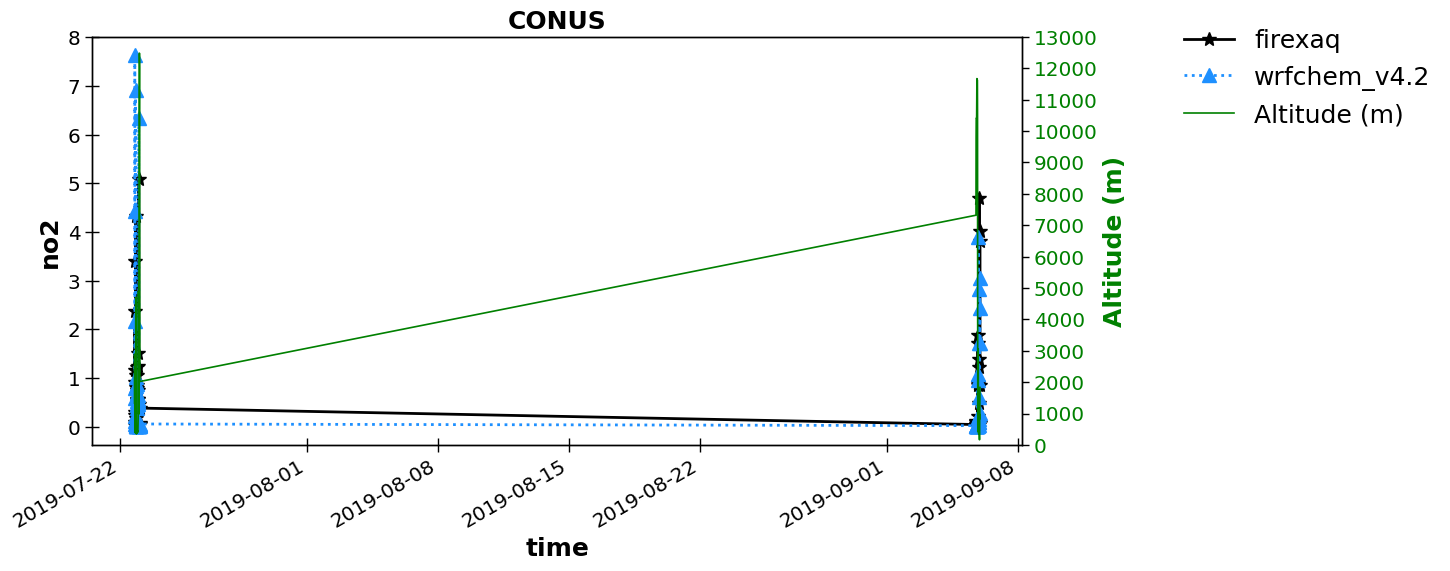

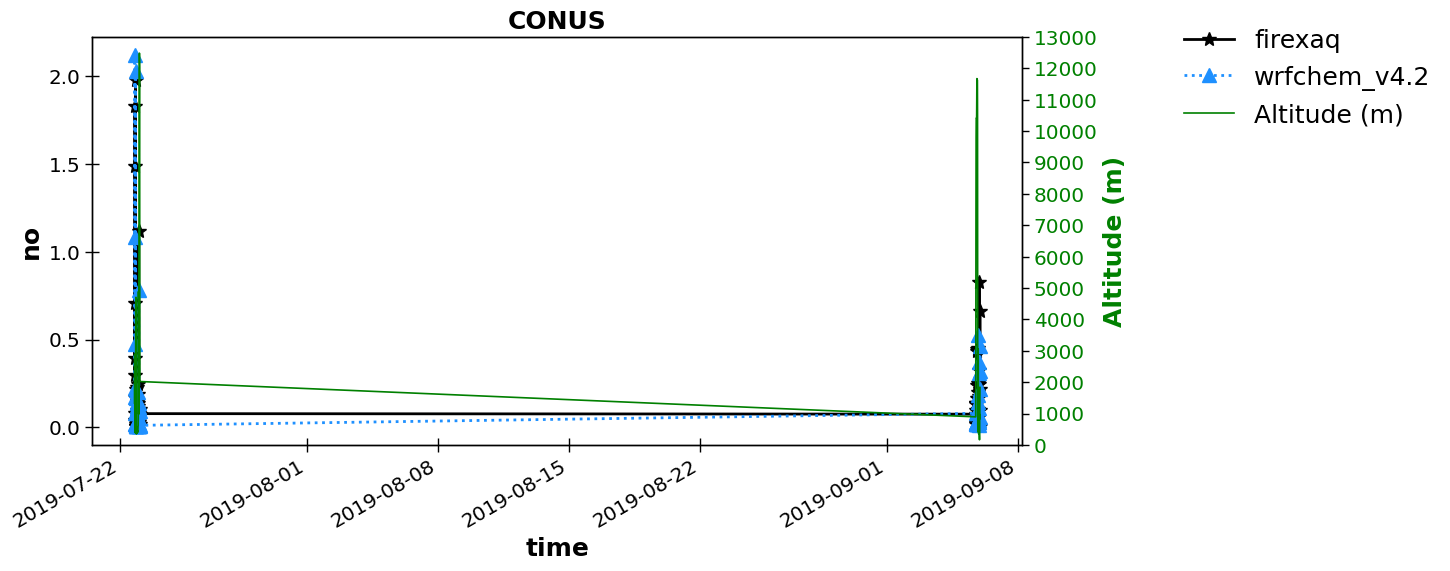

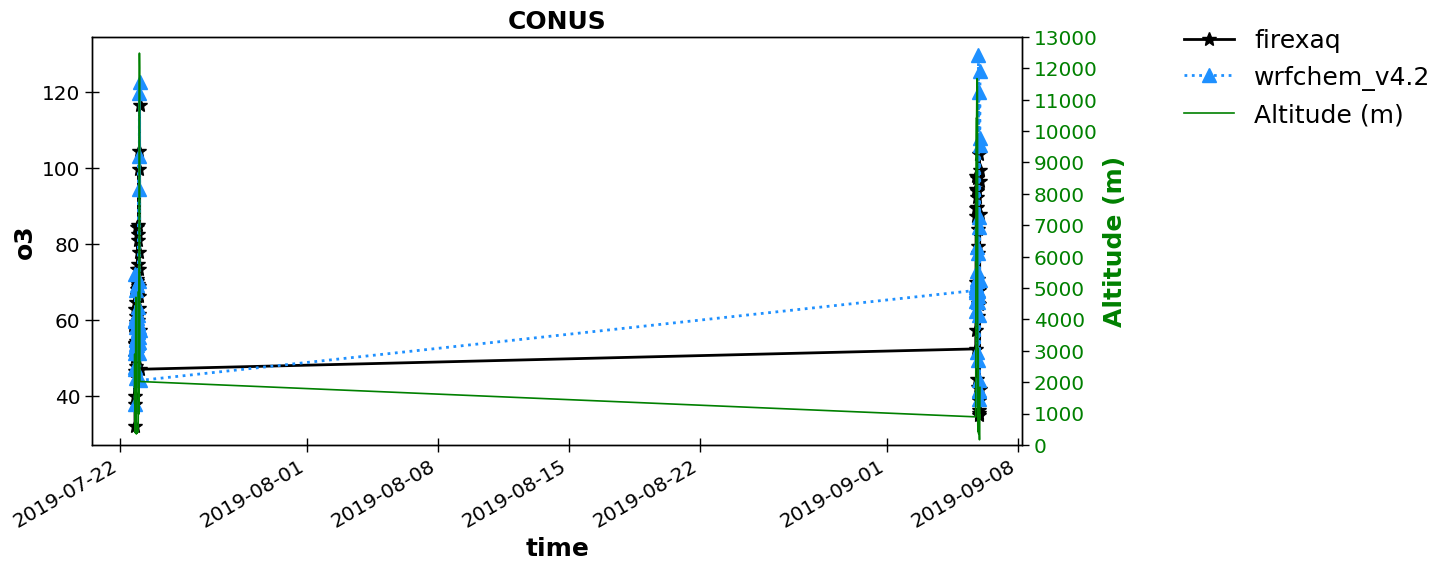

In [10]:
#And this generates all the plots.
an.plotting()